<h1>Lending Club Case Study</h1>
<h3>@Author: Baratchandar V, Barun Kumar Mishra</h3>
<h3>@Date: 23rd Mar 2020</h3>
<h3>@Version: 1.0</h3> 
<h3>@Description/@Business Objective: <br/>
    1. Finding the Risky loan applicants. <br/>
    2. The variables which are strong indicators of default. <br/>
    3. Risk analytics(Understanding the types of variables and their significance). <br/>
    4. The company can utilize this knowledge for its portfolio and risk assessment. <br/>
</h3>

In [427]:
## Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from openpyxl.workbook import Workbook
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker
%matplotlib inline

In [428]:
#Importing data to pandas dataframe
df_loans=pd.read_csv('loan.csv',delimiter=',',engine='python',encoding='iso-8859-1')
df_loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [429]:
df_loans.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                int64
member_id                         int64
loan_amnt                         int64
funded_amnt                       int64
funded_amnt_inv                   float64
term                              object
int_rate                          object
installment                       float64
grade                             object
sub_grade                         object
emp_title                         object
emp_length                        object
home_ownership                    object
annual_inc                        float64
verification_status               object
issue_d                           object
loan_status                       object
pymnt_plan                        object
url                               object
desc                              object
purpose                           object
title                         

In [430]:
#Totol Rows in data = 39717, Columns = 111 columns
#Checking Duplicate Rows
loandup = df_loans[df_loans.duplicated()]
loandup.shape

(0, 111)

In [431]:
#As row count comes zero, so there are no duplicate rows

In [432]:
#Checking for null values
#loan.count()
pd.options.display.max_rows = 1000
100*df_loans.isnull().sum()/df_loans.shape[0],2

(id                                  0.000000
 member_id                           0.000000
 loan_amnt                           0.000000
 funded_amnt                         0.000000
 funded_amnt_inv                     0.000000
 term                                0.000000
 int_rate                            0.000000
 installment                         0.000000
 grade                               0.000000
 sub_grade                           0.000000
 emp_title                           6.191303
 emp_length                          2.706650
 home_ownership                      0.000000
 annual_inc                          0.000000
 verification_status                 0.000000
 issue_d                             0.000000
 loan_status                         0.000000
 pymnt_plan                          0.000000
 url                                 0.000000
 desc                               32.580507
 purpose                             0.000000
 title                            

In [433]:
#Dropping columns which are having all entries as null
#dropped the columns with 98% null
df_loans=df_loans.dropna(thresh=df_loans.shape[0]*.098,how='all',axis=1)

In [434]:
df_loans.shape

(39717, 55)

In [435]:
#55 valid columns for analysis

In [436]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [437]:
df_loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


<h2>Derived Columns/Data Cleaning</h2>

In [438]:
#DataCleaning Steps
#Removing Months from term
df_loans['term_months'] = df_loans['term'].str.rstrip('months')
del df_loans['term']
df_loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_months
0,1077501,1296599,5000,5000,4975.0,10.65%,162.87,B,B2,NaN,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36
1,1077430,1314167,2500,2500,2500.0,15.27%,59.83,C,C4,Ryder,...,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60
2,1077175,1313524,2400,2400,2400.0,15.96%,84.33,C,C5,NaN,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36
3,1076863,1277178,10000,10000,10000.0,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36
4,1075358,1311748,3000,3000,3000.0,12.69%,67.79,B,B5,University Medical Group,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60


In [439]:
#Remvong % from interest rate
df_loans['int_rate_percentage'] = df_loans['int_rate'].str.rstrip('%')
del df_loans['int_rate']
df_loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_title,emp_length,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_months,int_rate_percentage
0,1077501,1296599,5000,5000,4975.0,162.87,B,B2,NaN,10+ years,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,10.65
1,1077430,1314167,2500,2500,2500.0,59.83,C,C4,Ryder,< 1 year,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60,15.27
2,1077175,1313524,2400,2400,2400.0,84.33,C,C5,NaN,10+ years,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,15.96
3,1076863,1277178,10000,10000,10000.0,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,13.49
4,1075358,1311748,3000,3000,3000.0,67.79,B,B5,University Medical Group,1 year,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60,12.69


In [440]:
#Separating month and year from column issue_d
df_loans['issue_d_month'], df_loans['issue_d_year'] = df_loans['issue_d'].str.split('-').str
del df_loans['issue_d']
df_loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_title,emp_length,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_months,int_rate_percentage,issue_d_month,issue_d_year
0,1077501,1296599,5000,5000,4975.0,162.87,B,B2,NaN,10+ years,...,INDIVIDUAL,0,0.0,0,0.0,0.0,36,10.65,Dec,11
1,1077430,1314167,2500,2500,2500.0,59.83,C,C4,Ryder,< 1 year,...,INDIVIDUAL,0,0.0,0,0.0,0.0,60,15.27,Dec,11
2,1077175,1313524,2400,2400,2400.0,84.33,C,C5,NaN,10+ years,...,INDIVIDUAL,0,0.0,0,0.0,0.0,36,15.96,Dec,11
3,1076863,1277178,10000,10000,10000.0,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,INDIVIDUAL,0,0.0,0,0.0,0.0,36,13.49,Dec,11
4,1075358,1311748,3000,3000,3000.0,67.79,B,B5,University Medical Group,1 year,...,INDIVIDUAL,0,0.0,0,0.0,0.0,60,12.69,Dec,11


In [441]:
#Separating month and year from column earliest_cr_line
df_loans['earliest_cr_line_month'], df_loans['earliest_cr_line_year'] = df_loans['earliest_cr_line'].str.split('-').str
del df_loans['earliest_cr_line']
df_loans.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_title,emp_length,...,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_months,int_rate_percentage,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,1077501,1296599,5000,5000,4975.0,162.87,B,B2,NaN,10+ years,...,0.0,0,0.0,0.0,36,10.65,Dec,11,Jan,85
1,1077430,1314167,2500,2500,2500.0,59.83,C,C4,Ryder,< 1 year,...,0.0,0,0.0,0.0,60,15.27,Dec,11,Apr,99
2,1077175,1313524,2400,2400,2400.0,84.33,C,C5,NaN,10+ years,...,0.0,0,0.0,0.0,36,15.96,Dec,11,Nov,01
3,1076863,1277178,10000,10000,10000.0,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.0,0,0.0,0.0,36,13.49,Dec,11,Feb,96
4,1075358,1311748,3000,3000,3000.0,67.79,B,B5,University Medical Group,1 year,...,0.0,0,0.0,0.0,60,12.69,Dec,11,Jan,96


In [442]:
#Separating month and year from column last_credit_pull_d
df_loans['last_credit_pull_d_month'], df_loans['last_credit_pull_d_year'] = df_loans['last_credit_pull_d'].str.split('-').str
del df_loans['last_credit_pull_d']
df_loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_title,emp_length,...,pub_rec_bankruptcies,tax_liens,term_months,int_rate_percentage,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_credit_pull_d_month,last_credit_pull_d_year
0,1077501,1296599,5000,5000,4975.0,162.87,B,B2,NaN,10+ years,...,0.0,0.0,36,10.65,Dec,11,Jan,85,May,16
1,1077430,1314167,2500,2500,2500.0,59.83,C,C4,Ryder,< 1 year,...,0.0,0.0,60,15.27,Dec,11,Apr,99,Sep,13
2,1077175,1313524,2400,2400,2400.0,84.33,C,C5,NaN,10+ years,...,0.0,0.0,36,15.96,Dec,11,Nov,01,May,16
3,1076863,1277178,10000,10000,10000.0,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.0,0.0,36,13.49,Dec,11,Feb,96,Apr,16
4,1075358,1311748,3000,3000,3000.0,67.79,B,B5,University Medical Group,1 year,...,0.0,0.0,60,12.69,Dec,11,Jan,96,May,16


<h2>Changing Column datatypes for analysis</h2>

In [443]:
columns = ['funded_amnt','loan_amnt', 'revol_bal', 'int_rate_percentage', 'revol_bal']
df_loans[columns] = df_loans[columns].astype(np.float)
df_loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_title,emp_length,...,pub_rec_bankruptcies,tax_liens,term_months,int_rate_percentage,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_credit_pull_d_month,last_credit_pull_d_year
0,1077501,1296599,5000.0,5000.0,4975.0,162.87,B,B2,NaN,10+ years,...,0.0,0.0,36,10.65,Dec,11,Jan,85,May,16
1,1077430,1314167,2500.0,2500.0,2500.0,59.83,C,C4,Ryder,< 1 year,...,0.0,0.0,60,15.27,Dec,11,Apr,99,Sep,13
2,1077175,1313524,2400.0,2400.0,2400.0,84.33,C,C5,NaN,10+ years,...,0.0,0.0,36,15.96,Dec,11,Nov,01,May,16
3,1076863,1277178,10000.0,10000.0,10000.0,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.0,0.0,36,13.49,Dec,11,Feb,96,Apr,16
4,1075358,1311748,3000.0,3000.0,3000.0,67.79,B,B5,University Medical Group,1 year,...,0.0,0.0,60,12.69,Dec,11,Jan,96,May,16


In [444]:
columns = ['total_acc', 'term_months', 'issue_d_year','earliest_cr_line_year']
df_loans[columns] = df_loans[columns].astype(np.int)
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 58 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null float64
funded_amnt                   39717 non-null float64
funded_amnt_inv               39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
loan_status                   39717 non-null object
pymnt_plan                    39717 non-null object
url                           39717 non-null object
desc                          26777 non-null object
purp

In [445]:
df_loans.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [446]:
df_loans.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [447]:
loansfullypaid  = df_loans[(df_loans['loan_status'] == 'Fully Paid')]
loanschargedoff = df_loans[(df_loans['loan_status'] == 'Charged Off')]
loansCurrent = df_loans[(df_loans['loan_status'] == 'Current')]

In [448]:
loanschargedoff.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_months,int_rate_percentage,issue_d_year,earliest_cr_line_year
count,5.627000e+03,5.627000e+03,5627.000000,5627.000000,5627.000000,5627.000000,5.627000e+03,5627.000000,5627.000000,5627.000000,...,5627.0,5627.0,5621.0,5627.0,5509.000000,5626.0,5627.000000,5627.000000,5627.000000,5627.000000
mean,6.978440e+05,8.677521e+05,12104.385108,11753.398792,10864.521324,336.175006,6.242730e+04,14.000624,0.170606,1.058113,...,1.0,0.0,0.0,0.0,0.067163,0.0,46.236360,13.820432,10.361294,57.850187
std,2.163767e+05,2.723270e+05,8085.732038,7760.516335,7661.750540,217.051841,4.777601e+04,6.585577,0.534986,1.154136,...,0.0,0.0,0.0,0.0,0.251773,0.0,11.870746,3.654413,0.895191,44.351669
min,6.141900e+04,8.035300e+04,900.000000,900.000000,0.000000,22.790000,4.080000e+03,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.000000,0.0,36.000000,5.420000,7.000000,0.000000
25%,5.297245e+05,6.849050e+05,5600.000000,5575.000000,5000.000000,168.555000,3.700000e+04,9.050000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.000000,0.0,36.000000,11.310000,10.000000,4.000000
50%,6.969370e+05,8.881580e+05,10000.000000,10000.000000,9401.209477,293.870000,5.300000e+04,14.290000,0.000000,1.000000,...,1.0,0.0,0.0,0.0,0.000000,0.0,36.000000,13.610000,11.000000,89.000000
75%,8.548760e+05,1.066578e+06,16500.000000,16000.000000,15000.000000,457.840000,7.500000e+04,19.290000,0.000000,2.000000,...,1.0,0.0,0.0,0.0,0.000000,0.0,60.000000,16.400000,11.000000,96.000000
max,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,1.250000e+06,29.850000,8.000000,8.000000,...,1.0,0.0,0.0,0.0,2.000000,0.0,60.000000,24.400000,11.000000,99.000000


In [449]:
loanschargedoff.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_title,emp_length,...,pub_rec_bankruptcies,tax_liens,term_months,int_rate_percentage,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_credit_pull_d_month,last_credit_pull_d_year
1,1077430,1314167,2500.0,2500.0,2500.0,59.83,C,C4,Ryder,< 1 year,...,0.0,0.0,60,15.27,Dec,11,Apr,99,Sep,13
8,1071795,1306957,5600.0,5600.0,5600.0,152.39,F,F2,NaN,4 years,...,0.0,0.0,60,21.28,Dec,11,Apr,4,Aug,12
9,1071570,1306721,5375.0,5375.0,5350.0,121.45,B,B5,Starbucks,< 1 year,...,0.0,0.0,60,12.69,Dec,11,Sep,4,Mar,13
12,1064687,1298717,9000.0,9000.0,9000.0,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,...,0.0,0.0,36,13.49,Dec,11,Apr,4,Nov,12
14,1069057,1303503,10000.0,10000.0,10000.0,325.74,B,B2,SFMTA,3 years,...,0.0,0.0,36,10.65,Dec,11,May,91,Mar,14


In [450]:
df_loans['issue_d_year']

0        11
1        11
2        11
3        11
4        11
         ..
39712     7
39713     7
39714     7
39715     7
39716     7
Name: issue_d_year, Length: 39717, dtype: int32

<h2>Univariate Analysis</h2>

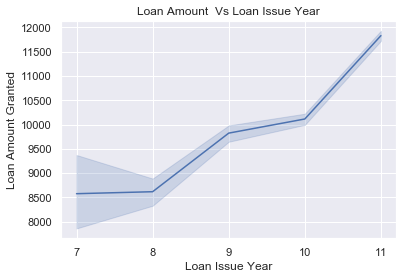

In [451]:
sns.lineplot(x='issue_d_year', y='funded_amnt', data=df_loans)
plt.title('Loan Amount  Vs Loan Issue Year')
plt.xlabel('Loan Issue Year')
plt.ylabel('Loan Amount Granted')
locator = matplotlib.ticker.MultipleLocator(1)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
#Loan Applicants have been increasing exponentially from year 2007 to 2011

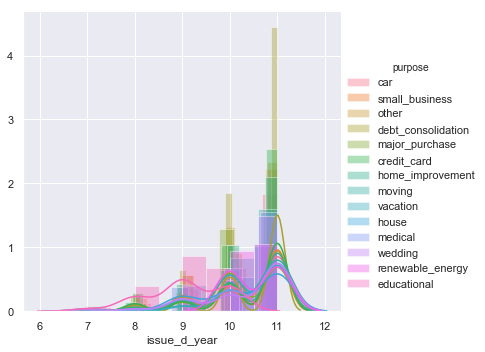

In [452]:
sns.FacetGrid(loanschargedoff,hue='purpose',size=5).map(sns.distplot,'issue_d_year').add_legend()

<h2>Segmented Univariate Analysis</h2>

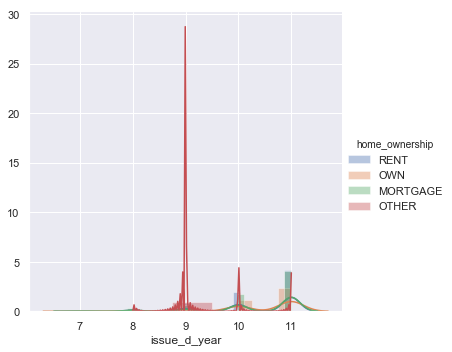

In [453]:
sns.FacetGrid(loanschargedoff,hue='home_ownership',size=5).map(sns.distplot,'issue_d_year').add_legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

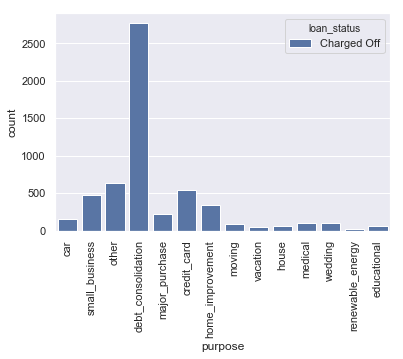

In [454]:
sns.countplot(x='purpose', hue="loan_status", data=loanschargedoff)
plt.xticks(rotation=90)

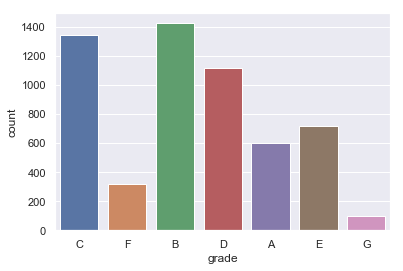

In [455]:
sns.countplot(x='grade', data=loanschargedoff)

Text(0.5,0,'Loan Term in Months')

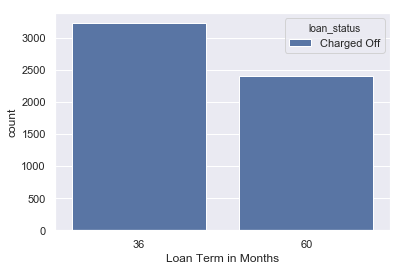

In [456]:
sns.countplot( x="term_months", hue='loan_status', data=loanschargedoff)
plot.xlabel('Loan Term in Months')

Text(0.5,0,'Loan Term in Months')

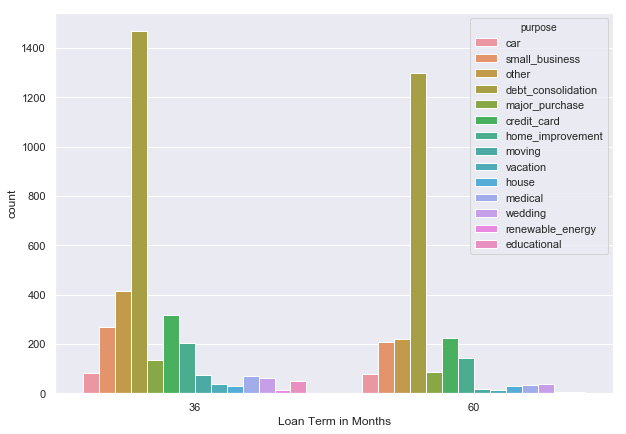

In [457]:
plt.figure(figsize=(10,7))
sns.countplot( x="term_months", hue='purpose', data=loanschargedoff)
plt.xlabel('Loan Term in Months')

<h2>BiVariate Analysis</h2>

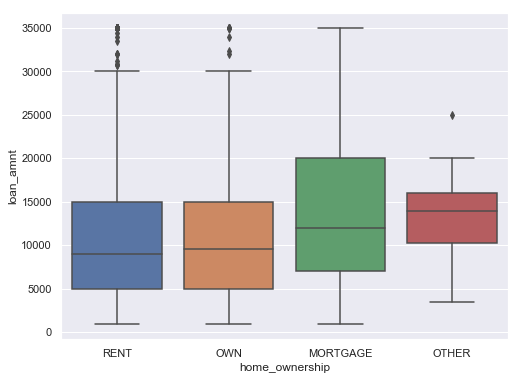

In [458]:
var = 'home_ownership'
#
data_boxplot = pd.concat([loanschargedoff['loan_amnt'],loanschargedoff[var]],axis=1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y ='loan_amnt',data=data_boxplot)

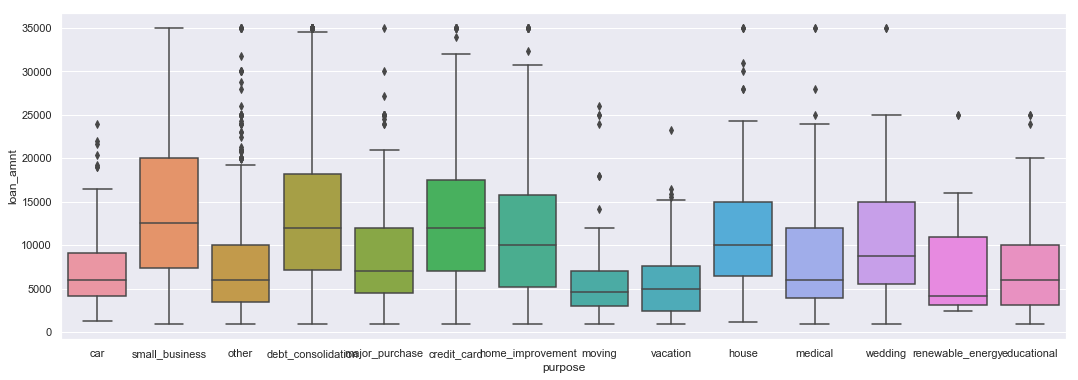

In [459]:
var = 'purpose'
#
data_boxplot = pd.concat([loanschargedoff['loan_amnt'],loanschargedoff[var]],axis=1)
f,ax = plt.subplots(figsize=(18,6))
fig = sns.boxplot(x=var,y ='loan_amnt',data=data_boxplot)

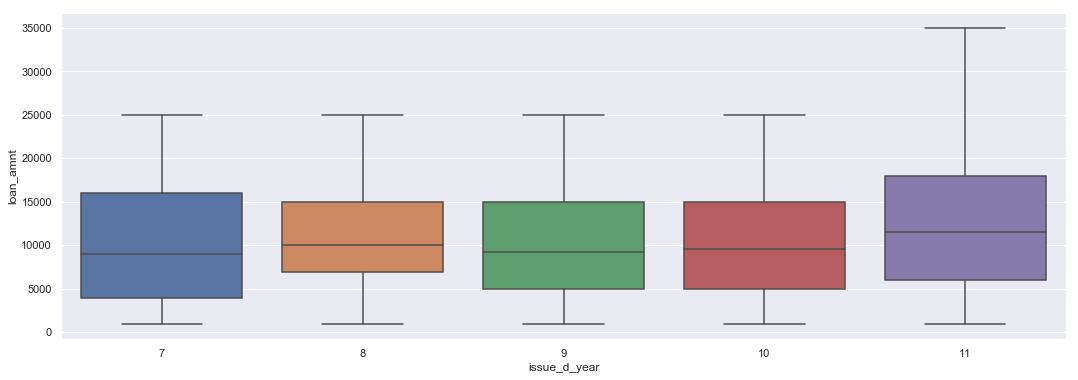

In [460]:
#var = 'issue_d_year'
var = 'issue_d_year'
data_boxplot = pd.concat([loanschargedoff['loan_amnt'],loanschargedoff[var]],axis=1)
f,ax = plt.subplots(figsize=(18,6))
fig = sns.boxplot(x=var,y ='loan_amnt',data=data_boxplot)

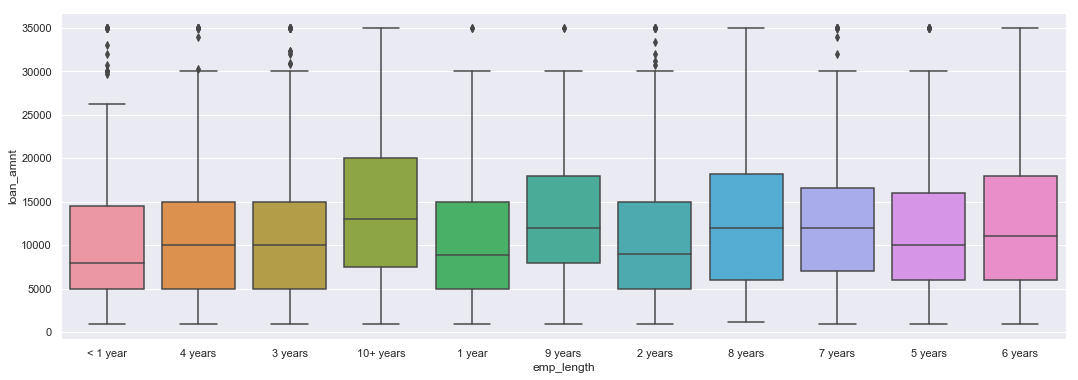

In [461]:
#var = 'emp_length'
var = 'emp_length'
data_boxplot = pd.concat([loanschargedoff['loan_amnt'],loanschargedoff[var]],axis=1)
f,ax = plt.subplots(figsize=(18,6))
fig = sns.boxplot(x=var,y ='loan_amnt',data=data_boxplot)

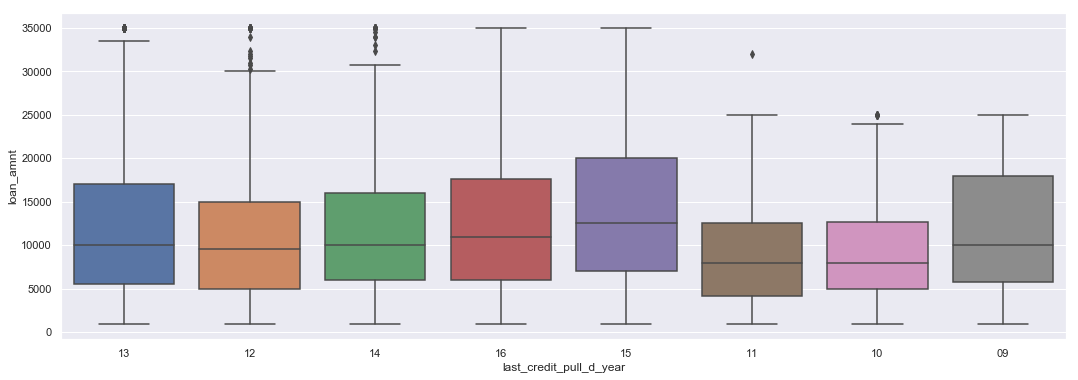

In [462]:
#var = 'last_credit_pull_d_year'
var = 'last_credit_pull_d_year'
data_boxplot = pd.concat([loanschargedoff['loan_amnt'],loanschargedoff[var]],axis=1)
f,ax = plt.subplots(figsize=(18,6))
fig = sns.boxplot(x=var,y ='loan_amnt',data=data_boxplot)

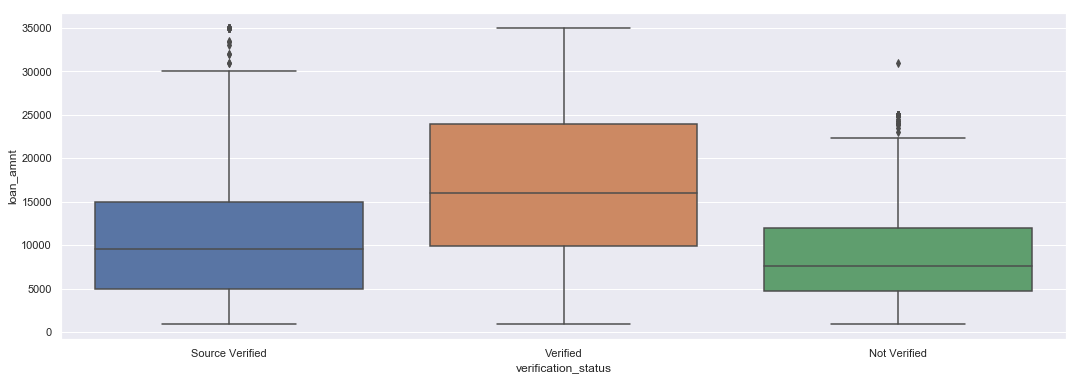

In [463]:
var = 'verification_status'
#
data_boxplot = pd.concat([loanschargedoff['loan_amnt'],loanschargedoff[var]],axis=1)
f,ax = plt.subplots(figsize=(18,6))
fig = sns.boxplot(x=var,y ='loan_amnt',data=data_boxplot)

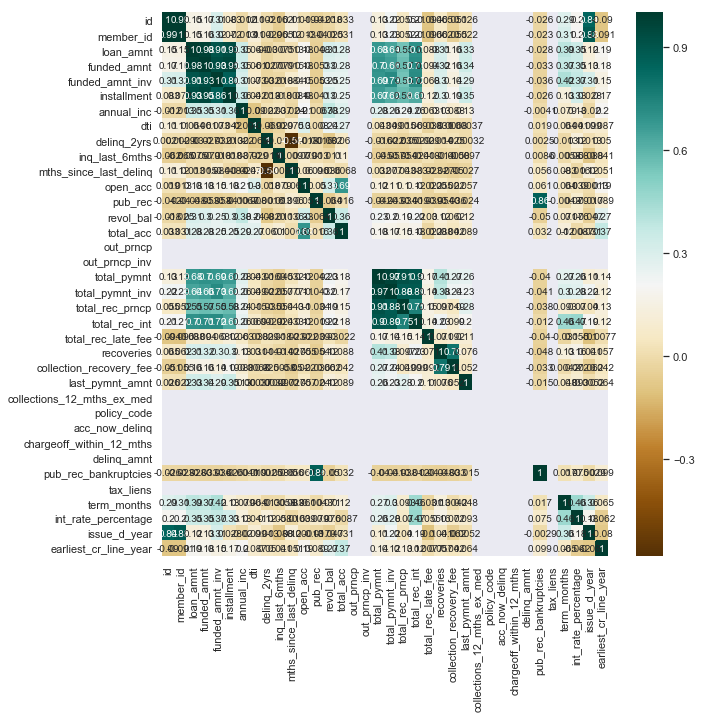

In [464]:
#HeatMap
plt.figure(figsize=(10,10))
c=loanschargedoff.corr()
sns.heatmap(c,annot=True,cmap="BrBG")

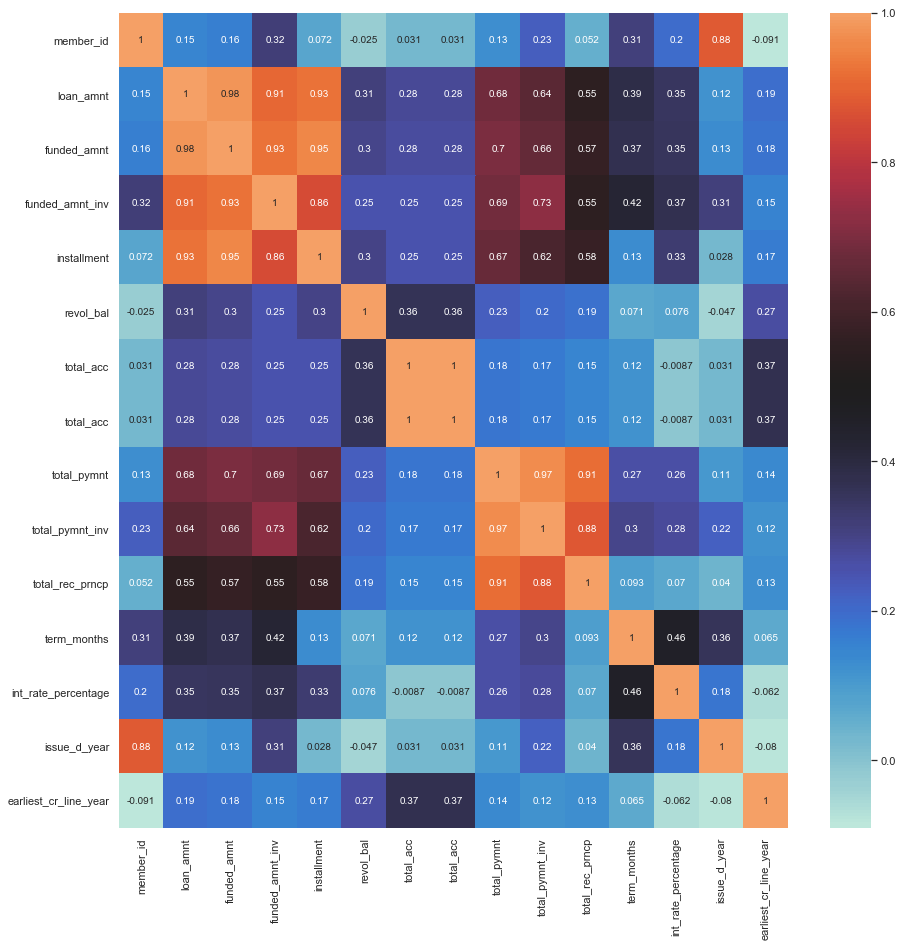

In [465]:
#Adding only very important columns for bivariate analysis
plt.figure(figsize=(15,15))
cont_var= ['member_id','loan_amnt','funded_amnt','funded_amnt_inv','installment','grade','loan_status','purpose','revol_bal',
          'total_acc','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp',
           'term_months','int_rate_percentage','issue_d_month','issue_d_year','earliest_cr_line_month','earliest_cr_line_year']
corr = loanschargedoff[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

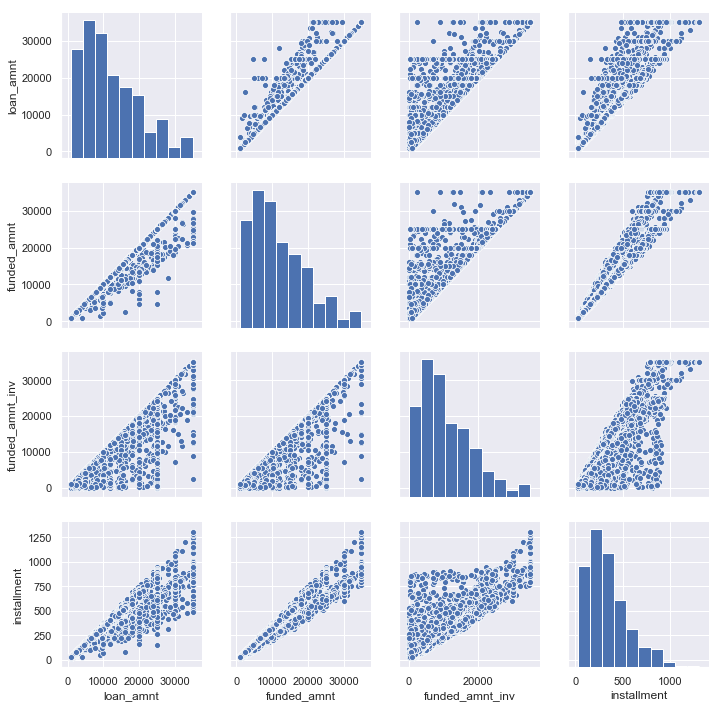

In [466]:
 sns.set()
 paircols = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','grade','sub_grade','emp_title','emp_length','home_ownership']
 sns.pairplot(loanschargedoff[paircols],size = 2.5)
 plt.show()

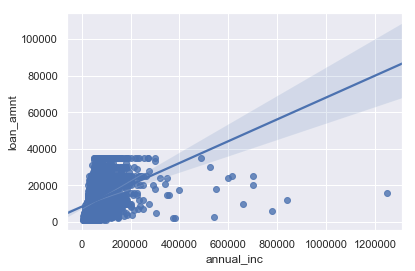

In [467]:
ax = sns.regplot(x="annual_inc", y="loan_amnt", data=loanschargedoff)

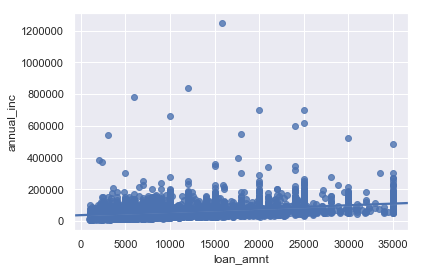

In [468]:
ax = sns.regplot(x="loan_amnt", y="annual_inc", data=loanschargedoff)